# CoronaVirus

* Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

* Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
 
* The best way to prevent and slow down transmission is to be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 
 
* The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).


<img src = "https://i.pinimg.com/originals/a8/d8/66/a8d866c87e75ae65af8a3f167ee1e8f6.gif"/>

In [3]:
#Import required libraries

import pandas as pd
import numpy as np

from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
cf.go_offline()
import os


import matplotlib.pyplot as plt
import seaborn as sns

# Importing and Visualization of data

In [4]:
full_data = pd.read_csv('full_data.csv')

full_data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Substitute Nan with zeros

In [5]:
full_data = full_data.fillna(0)
full_data_animation = full_data.copy()

full_data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Providing datatype to each column

In [6]:
from datetime import datetime

full_data = full_data.astype({
    'location':str, 
    'new_cases':int, 
    'new_deaths':int,
    'total_cases':int,
    'total_deaths':int,
    'weekly_cases':int,
    'weekly_deaths':int,
    'biweekly_cases':int,
    'biweekly_deaths':int
})

full_data.date = pd.to_datetime(full_data.date)

# Plotting the graph of total number of cases till date

In [7]:
# Extracting required features and processing time

full_data_total = full_data[['date','location','total_cases', 'total_deaths']]

latest_time = pd.to_datetime('2020-10-11 00:00:00')

def return_nepal(date):
    if(date == latest_time):
        return True
    else:
        return False
    
def return_noworld(location):
    if(location!='World'):
        return True
    else:
        return False
    
full_data_total = full_data_total[full_data_total['date'].apply(return_nepal)]
full_data_total = full_data_total[full_data_total['location'].apply(return_noworld)]

full_data_total_table = full_data_total[['location','total_cases', 'total_deaths']]
full_data_total_table = full_data_total_table.sort_values('total_cases', ascending=False)

full_data_total_table = full_data_total_table.reset_index(drop=True)
full_data_total_table.style.background_gradient(cmap='Oranges')

,location,total_cases,total_deaths
0,United States,7718947,214377
1,India,7053806,108334
2,Brazil,5082637,150198
3,Russia,1285084,22454
4,Colombia,902747,27660
5,Argentina,883883,23581
6,Peru,846088,33223
7,Mexico,814328,83642
8,France,718873,32684
9,South Africa,690896,17673


In [8]:
# Visualizing the data

from plotly.subplots import make_subplots

labels = full_data_total['location'].tolist()

values1 = full_data_total['total_cases'].tolist()
values2 = full_data_total['total_deaths'].tolist()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values1, name="Total Cases"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Total Deaths"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textposition='inside')

fig.update_layout(
    autosize=True,
    width = 1000,
    title_text="CoronaVirus Total Cases and Death Cases per Country",
    # Add annotations in the center of the donut pies.
    annotations=[
                 dict(text='Total Cases', x=0.18, y=0.5, font_size=13, showarrow=False),
                dict(text='Total Deaths', x=0.83, y=0.5, font_size=13, showarrow=False)])
fig.show()

# Visualizing Total Cases in Map

In [9]:
trace1 = [go.Choropleth(
               colorscale = 'Picnic',
               locationmode = 'country names',
               locations = labels,
               text = labels, 
               z = values1,
               )]

layout = dict(title = 'CoronaVirus Total Cases',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
iplot(fig)


# Bar Chart : Total Cases and Death Cases

In [10]:
full_data_total_sort = full_data_total.sort_values('total_cases', ascending=False)
full_data_total_10 = full_data_total_sort[:10]

full_data_total_10.iplot(x='location', y=['total_cases', 'total_deaths'], kind='bar', xTitle='Country', yTitle='Number of Cases', title='Top 10 Country with CoronaVirus Cases and Death Cases')

# Interesting Facts

1. Top country having highest cases USA, India and Brazil
2. USA has the highest Corona cases and death cases
3. Even having less number of Corona Cases than India, Brazil has more death cases

# Analyzing South Asia Data

In [11]:
full_data_india = full_data[full_data['location'].apply(lambda x: True if x=='India' else False)]
full_data_Bhutan = full_data[full_data['location'].apply(lambda x: True if x=='Bhutan' else False)]
full_data_Bangladesh = full_data[full_data['location'].apply(lambda x: True if x=='Bangladesh' else False)]
full_data_Afghanistan = full_data[full_data['location'].apply(lambda x: True if x=='Afghanistan' else False)]
full_data_SriLanka = full_data[full_data['location'].apply(lambda x: True if x=='Sri Lanka' else False)]
full_data_Nepal = full_data[full_data['location'].apply(lambda x: True if x=='Nepal' else False)]
full_data_Pakistan = full_data[full_data['location'].apply(lambda x: True if x=='Pakistan' else False)]
full_data_Maldives = full_data[full_data['location'].apply(lambda x: True if x=='Maldives' else False)]


# Visualizing the time Series data 
fig = go.Figure()
fig.add_trace(go.Scatter(x=full_data_india['date'], y=full_data_india['total_cases'],name='India'))
fig.add_trace(go.Scatter(x=full_data_Bhutan['date'], y=full_data_Bhutan['total_cases'],name='Bhutan'))
fig.add_trace(go.Scatter(x=full_data_Bangladesh['date'], y=full_data_Bangladesh['total_cases'],name='Bangladesh'))
fig.add_trace(go.Scatter(x=full_data_Afghanistan['date'], y=full_data_Afghanistan['total_cases'],name='Afghanistan'))
fig.add_trace(go.Scatter(x=full_data_SriLanka['date'], y=full_data_SriLanka['total_cases'],name='Sri Lanka'))
fig.add_trace(go.Scatter(x=full_data_Nepal['date'], y=full_data_Nepal['total_cases'],name='Nepal'))
fig.add_trace(go.Scatter(x=full_data_Pakistan['date'], y=full_data_Pakistan['total_cases'],name='Nepal'))
fig.add_trace(go.Scatter(x=full_data_Pakistan['date'], y=full_data_Pakistan['total_cases'],name='Nepal'))


# Set x-axis title
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Number of Cases")
fig.update_layout(title_text='Total Cases per Country')
fig.show()

In [12]:
# Visualizing the time Series data 
fig = go.Figure()
fig.add_trace(go.Scatter(x=full_data_india['date'], y=full_data_india['total_deaths'],name='India'))
fig.add_trace(go.Scatter(x=full_data_Bhutan['date'], y=full_data_Bhutan['total_deaths'],name='Bhutan'))
fig.add_trace(go.Scatter(x=full_data_Bangladesh['date'], y=full_data_Bangladesh['total_deaths'],name='Bangladesh'))
fig.add_trace(go.Scatter(x=full_data_Afghanistan['date'], y=full_data_Afghanistan['total_deaths'],name='Afghanistan'))
fig.add_trace(go.Scatter(x=full_data_SriLanka['date'], y=full_data_SriLanka['total_deaths'],name='Sri Lanka'))
fig.add_trace(go.Scatter(x=full_data_Nepal['date'], y=full_data_Nepal['total_deaths'],name='Nepal'))
fig.add_trace(go.Scatter(x=full_data_Pakistan['date'], y=full_data_Pakistan['total_deaths'],name='Nepal'))
fig.add_trace(go.Scatter(x=full_data_Pakistan['date'], y=full_data_Pakistan['total_deaths'],name='Nepal'))


# Set x-axis title
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Number of Cases")
fig.update_layout(title_text='Death Cases per Country')
fig.show()

In [13]:
# Extracting only data of Nepal
def return_south(location):
    if(location in ['Nepal','India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka','Maldives','Pakistan']):
        return True
    else:
        return False

full_data_total_south = full_data_total[full_data_total['location'].apply(return_south)]
full_data_total_south_present = full_data_total_south[full_data_total_south['date'].apply(return_nepal)]

full_data_total_south_present_sort = full_data_total_south_present.sort_values('total_cases', ascending=False)
full_data_total_south_present_sort.iplot(x='location', y=['total_cases', 'total_deaths'], kind='bar', xTitle='Country', yTitle='Number of Cases', title='South Asia CoronaVirus Cases and Death Cases')

1. India has the highest case in South Asia
2. Bhutan has the least case of Corona

# Analyzing North Africa Data

In [14]:
full_data_Algeria = full_data[full_data['location'].apply(lambda x: True if x=='Algeria' else False)]
full_data_Egypt = full_data[full_data['location'].apply(lambda x: True if x=='Egypt' else False)]
full_data_Libya = full_data[full_data['location'].apply(lambda x: True if x=='Libya' else False)]
full_data_Morocco = full_data[full_data['location'].apply(lambda x: True if x=='Morocco' else False)]
full_data_Sudan = full_data[full_data['location'].apply(lambda x: True if x=='Sudan' else False)]
full_data_Tunisia = full_data[full_data['location'].apply(lambda x: True if x=='Tunisia' else False)]
full_data_WesternSahara= full_data[full_data['location'].apply(lambda x: True if x=='Western Sahara' else False)]


# Visualizing the time Series data 
fig = go.Figure()
fig.add_trace(go.Scatter(x=full_data_Algeria['date'], y=full_data_Algeria['total_cases'],name='Algeria'))
fig.add_trace(go.Scatter(x=full_data_Egypt['date'], y=full_data_Egypt['total_cases'],name='Egypt'))
fig.add_trace(go.Scatter(x=full_data_Libya['date'], y=full_data_Libya['total_cases'],name='Libya'))
fig.add_trace(go.Scatter(x=full_data_Morocco['date'], y=full_data_Morocco['total_cases'],name='Morocco'))
fig.add_trace(go.Scatter(x=full_data_Sudan['date'], y=full_data_Sudan['total_cases'],name='Sudan'))
fig.add_trace(go.Scatter(x=full_data_Tunisia['date'], y=full_data_Tunisia['total_cases'],name='Tunisia'))
fig.add_trace(go.Scatter(x=full_data_WesternSahara['date'], y=full_data_WesternSahara['total_cases'],name='Western Sahara'))

# Set x-axis title
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Number of Cases")
fig.update_layout(title_text='Total Cases per Country')
fig.show()

In [15]:
# Visualizing the time Series data 
fig = go.Figure()
fig.add_trace(go.Scatter(x=full_data_Algeria['date'], y=full_data_Algeria['total_deaths'],name='Algeria'))
fig.add_trace(go.Scatter(x=full_data_Egypt['date'], y=full_data_Egypt['total_deaths'],name='Egypt'))
fig.add_trace(go.Scatter(x=full_data_Libya['date'], y=full_data_Libya['total_deaths'],name='Libya'))
fig.add_trace(go.Scatter(x=full_data_Morocco['date'], y=full_data_Morocco['total_deaths'],name='Morocco'))
fig.add_trace(go.Scatter(x=full_data_Sudan['date'], y=full_data_Sudan['total_deaths'],name='Sudan'))
fig.add_trace(go.Scatter(x=full_data_Tunisia['date'], y=full_data_Tunisia['total_deaths'],name='Tunisia'))
fig.add_trace(go.Scatter(x=full_data_WesternSahara['date'], y=full_data_WesternSahara['total_deaths'],name='Western Sahara'))

# Set x-axis title
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Number of Cases")
fig.update_layout(title_text='Total Cases per Country')
fig.show()

In [16]:
# Extracting only data of Nepal
def return_north(location):
    if(location in ['Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia', 'Western Sahara']):
        return True
    else:
        return False

full_data_total_africa = full_data_total[full_data_total['location'].apply(return_north)]

full_data_total_africa_present_sort = full_data_total_africa.sort_values('total_cases', ascending=False)
full_data_total_africa_present_sort.iplot(x='location', y=['total_cases', 'total_deaths'], kind='bar', xTitle='Country', yTitle='Number of Cases', title='North Africa CoronaVirus Cases and Death Cases')

1. Morocco has highest number of cases
2. Even having lesser number of cases than Morocco, Egypt has more death cases

# Analyzing North European Data

In [17]:
full_data_Estonia = full_data[full_data['location'].apply(lambda x: True if x=='Estonia' else False)]
full_data_Latvia = full_data[full_data['location'].apply(lambda x: True if x=='Latvia' else False)]
full_data_Lithuania= full_data[full_data['location'].apply(lambda x: True if x=='Lithuania' else False)]
full_data_Denmark= full_data[full_data['location'].apply(lambda x: True if x=='Denmark' else False)]
full_data_Finland = full_data[full_data['location'].apply(lambda x: True if x=='Finland' else False)]
full_data_Iceland = full_data[full_data['location'].apply(lambda x: True if x=='Iceland' else False)]
full_data_Norway= full_data[full_data['location'].apply(lambda x: True if x=='Norway' else False)]
full_data_Sweden = full_data[full_data['location'].apply(lambda x: True if x=='Sweden' else False)]


# Visualizing the time Series data 
fig = go.Figure()
fig.add_trace(go.Scatter(x=full_data_Estonia['date'], y=full_data_Estonia['total_cases'],name='Estonia'))
fig.add_trace(go.Scatter(x=full_data_Latvia['date'], y=full_data_Latvia['total_cases'],name='Latvia'))
fig.add_trace(go.Scatter(x=full_data_Lithuania['date'], y=full_data_Lithuania['total_cases'],name='Lithuania'))
fig.add_trace(go.Scatter(x=full_data_Denmark['date'], y=full_data_Denmark['total_cases'],name='Denmark'))
fig.add_trace(go.Scatter(x=full_data_Finland['date'], y=full_data_Finland['total_cases'],name='Finland'))
fig.add_trace(go.Scatter(x=full_data_Iceland['date'], y=full_data_Iceland['total_cases'],name='Iceland'))
fig.add_trace(go.Scatter(x=full_data_Norway['date'], y=full_data_Norway['total_cases'],name='Norway'))
fig.add_trace(go.Scatter(x=full_data_Sweden['date'], y=full_data_Sweden['total_cases'],name='Sweden'))

# Set x-axis title
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Number of Cases")
fig.update_layout(title_text='Total Cases per Country')
fig.show()

In [18]:
# Visualizing the time Series data 
fig = go.Figure()
fig.add_trace(go.Scatter(x=full_data_Estonia['date'], y=full_data_Estonia['total_deaths'],name='Estonia'))
fig.add_trace(go.Scatter(x=full_data_Latvia['date'], y=full_data_Latvia['total_deaths'],name='Latvia'))
fig.add_trace(go.Scatter(x=full_data_Lithuania['date'], y=full_data_Lithuania['total_deaths'],name='Lithuania'))
fig.add_trace(go.Scatter(x=full_data_Denmark['date'], y=full_data_Denmark['total_deaths'],name='Denmark'))
fig.add_trace(go.Scatter(x=full_data_Finland['date'], y=full_data_Finland['total_deaths'],name='Finland'))
fig.add_trace(go.Scatter(x=full_data_Iceland['date'], y=full_data_Iceland['total_deaths'],name='Iceland'))
fig.add_trace(go.Scatter(x=full_data_Norway['date'], y=full_data_Norway['total_deaths'],name='Norway'))
fig.add_trace(go.Scatter(x=full_data_Sweden['date'], y=full_data_Sweden['total_deaths'],name='Sweden'))

# Set x-axis title
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Number of Cases")
fig.update_layout(title_text='Death Cases per Country')
fig.show()

In [19]:
# Extracting only data of Nepal
def return_north_europe(location):
    if(location in ['Estonia', 'Latvia', 'Lithuania', 'Denmark', 'Finland', 'Iceland', 'Norway', 'Sweden']):
        return True
    else:
        return False

full_data_total_northeurope = full_data_total[full_data_total['location'].apply(return_north_europe)]

full_data_total_northeurope_present_sort = full_data_total_northeurope.sort_values('total_cases', ascending=False)
full_data_total_northeurope_present_sort.iplot(x='location', y=['total_cases', 'total_deaths'], kind='bar', xTitle='Country', yTitle='Number of Cases', title='North European CoronaVirus Cases and Death Cases')

1. Denark has the highest Total cases and Death Cases

# Analyzing Nepal Data

# Plotting only the graph of Nepal(TimeSeries)

In [20]:
# Extracting only data of Nepal
def return_nepal(location):
    if(location in ['Nepal']):
        return True
    else:
        return False

full_data_nepal = full_data[full_data.location.apply(return_nepal)]

# Visualizing the time Series data 
fig = go.Figure()
fig.add_trace(go.Scatter(x=full_data_nepal['date'], y=full_data_nepal['total_cases'], fill='tozeroy',name='Total Cases'))
fig.add_trace(go.Scatter(x=full_data_nepal['date'], y=full_data_nepal['total_deaths'], fill='tozeroy',name='Total Death'))


# Set x-axis title
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Number of Cases")
fig.show()

# Gaining more insight using BoxPlot

In [21]:
import plotly.express as px 

#New CoronaVirus Cases 
fig = px.box(full_data_nepal, y='new_cases', title='CoronaVirus New Cases Per Day')
fig.show()

In [22]:
#New CoronaVirus Death Cases 
fig = px.box(full_data_nepal, y='new_deaths', title='CoronaVirus New Death Cases Per Day')
fig.show()

# Facts

1. Highest CoronaVirus Cases in a Day is 5008
1. Highest CoronaVirus Death Cases in a Day is 19

* Removing the features which will not be with us in present condition for prediction
* Task to forecast the new death

In [23]:
full_data_nepal_process = full_data_nepal[['date', 'new_cases', 'new_deaths', 'total_cases',
       'weekly_cases', 'biweekly_cases'
       ]]

# Correlations between Data

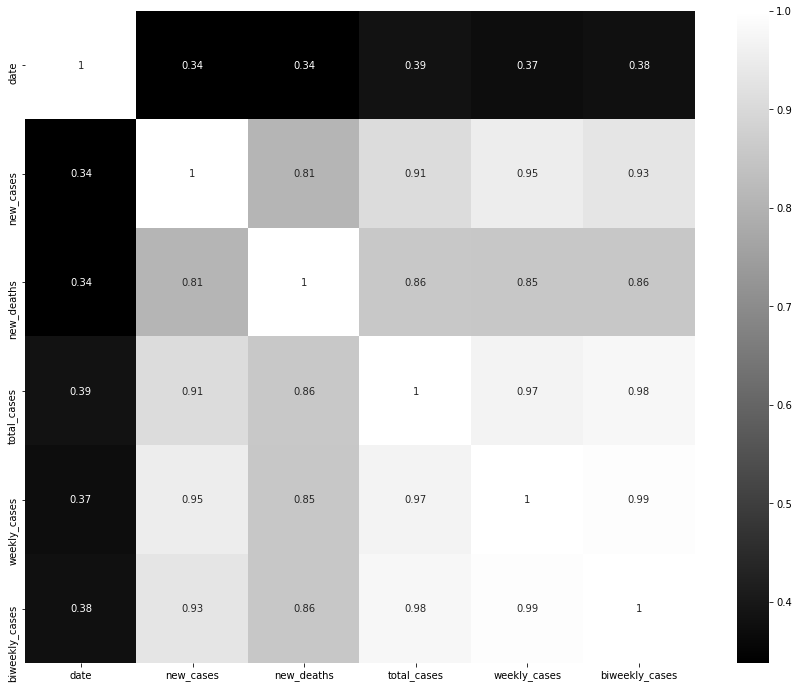

In [24]:
full_data_nepal_process['date'] = full_data_nepal_process['date'].dt.strftime('%y%m%d')
full_data_nepal_process['date'] = full_data_nepal_process['date'].astype(int)

plt.rcParams['figure.figsize'] = (15, 12)
sns.heatmap(full_data_nepal_process.corr(), cmap='gray', annot=True)
plt.show()

* Almost all features are highly correlated with eachother

# New Death Case Prediction

In [25]:
full_data_nepal_process['date'].head()

X = full_data_nepal_process[['date', 'total_cases', 'new_cases',
        'weekly_cases', 'biweekly_cases'
       ]].to_numpy()


Y = full_data_nepal_process[['new_deaths']].to_numpy()

from sklearn.model_selection import train_test_split

#make the x for train and test (also called validation data) 
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.9,random_state=42, shuffle=True)

# Model Building

Model building and tuning is done using PYCaret which is a AutoML Solution for Machine Learning

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from joblib import dump, load

def return_error(x_train,x_test,y_train):
    model = KNeighborsRegressor(algorithm='ball_tree', leaf_size=50, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=14, p=2,
                    weights='uniform')
    model.fit(x_train, y_train)
    dump(model, 'regressor.joblib')
    
    predict = model.predict(x_test)
    return predict

In [27]:
y_train = y_train.ravel()
predict = return_error(x_train,x_test,y_train)

# Scatter Plot: Actual  VS Predict Salary

# R2

R Square is calculated by the sum of squared of prediction error divided by the total sum of square which replace the calculated prediction with mean. R Square value is between 0 to 1 and bigger value indicates a better fit between prediction and actual value.

For more Info: [About Value of R2](https://www.researchgate.net/post/What_is_the_acceptable_R-squared_in_the_information_system_research_Can_you_provide_some_references)

In [28]:
from sklearn.metrics import r2_score

#for total cases
r2_score(y_test, predict)

0.7737931711145996

# MSE

While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit.

In [29]:
from sklearn.metrics import mean_squared_error

#for total cases
mean_squared_error(y_test, predict)

3.1889514426460246

# Distribution Plot of Actual Deaths VS Predict Deaths

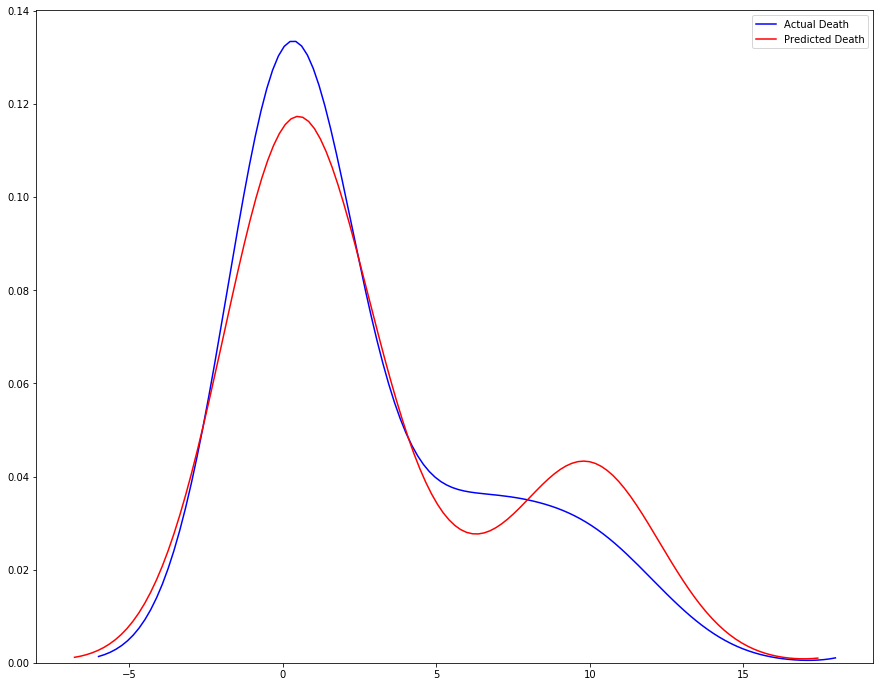

In [30]:
import numpy as np
import matplotlib.pyplot as plt

hist1 = y_test
hist2 = predict

from scipy.stats import norm

sns.distplot(hist1,color="b",hist=False, label='Actual Death')
sns.distplot(hist2,hist=False,color='red', label='Predicted Death')